# **Final Project - Morphological Galaxy Classification with Transfer Learning**
Savanna Guertin, 219448412      
Andrew Pascual,  219494575     
CSC 180-01  
May 3, 2021

# Importing and Examining the Dataset
1. Galaxy10 dataset classification labels come from Galaxy Zoo: zooniverse.org/projects/zookeeper/galaxy-zoo/
2. Galaxy10 dataset images come from Sloan Digital Sky Survey


Galaxy10 is a dataset contains 21785, 69x69 pixels colored galaxy images (g, r and i band) separated in 10 classes. Galaxy10 images come from Sloan Digital Sky Survey and labels come from Galaxy Zoo. The dataset has columns: images with shape (25753, 69, 69, 3), ans, ra, dec, redshift, and pxscale (unit of arcsecond per pixel).

In [1]:
!pip install astroNN


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!
===================Data Inspection===================


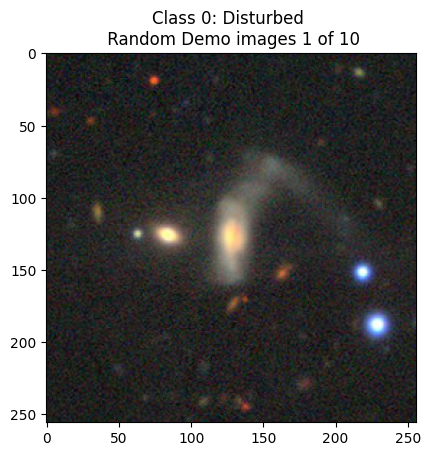

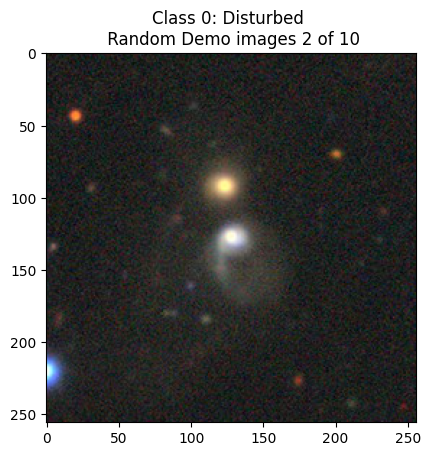

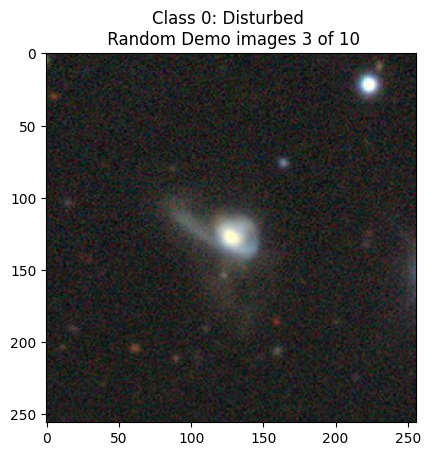

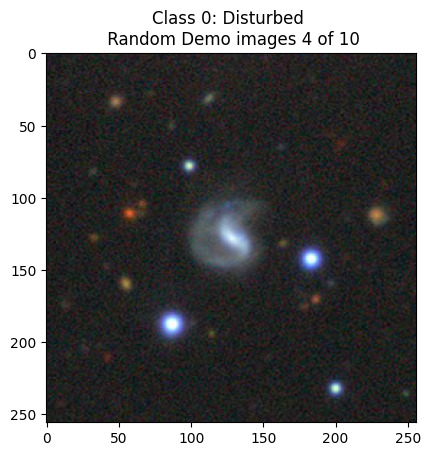

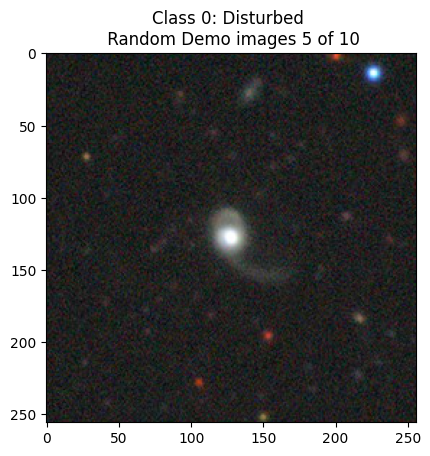

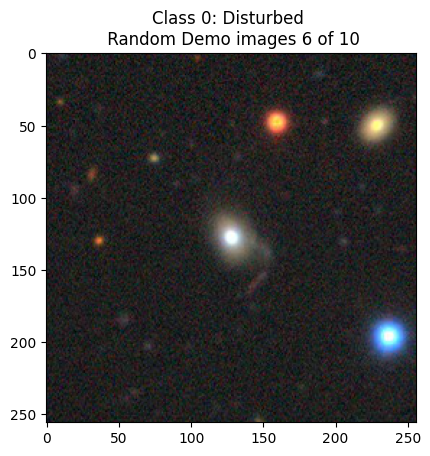

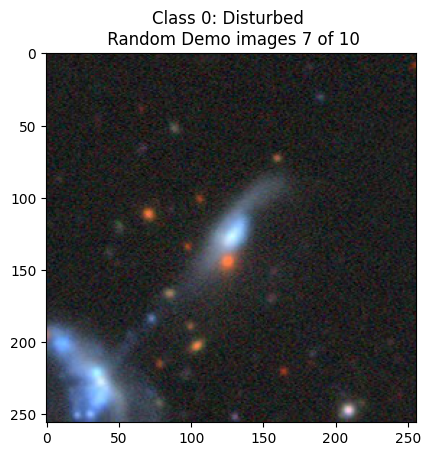

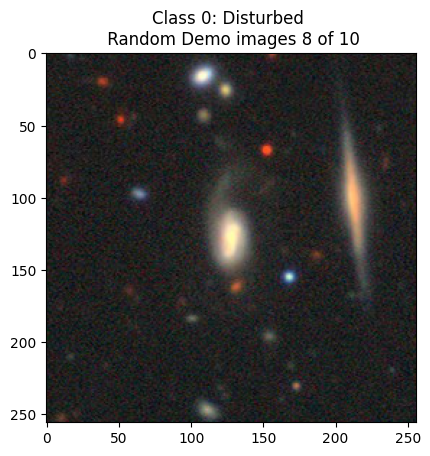

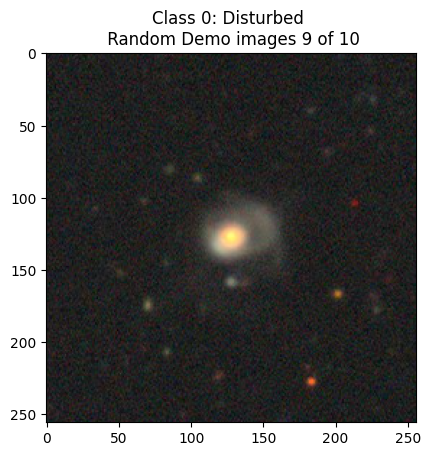

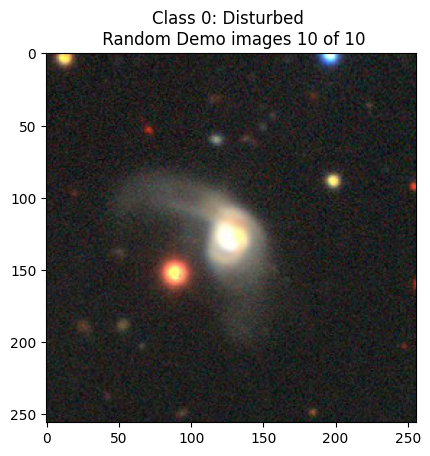

===============Data Inspection Finished===============


In [2]:
# import everything we need first
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt
from astroNN.datasets import load_galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

# code from: https://astronn.readthedocs.io/en/latest/galaxy10.html
# Authors: Henry Leung, Department of Astronomy & Astrophysic, University of Toronto
#          Jo Bovy, Department of Astronomy & Astrophysic, University of Toronto

# To load images and labels
images, labels = load_galaxy10()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')


# converting to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [3]:
# double checking shapes
print(images.shape)
print(labels.shape)

(17736, 256, 256, 3)
(17736, 10)


In [4]:
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

galaxy10cls_lookup(5) # put a class number to get back the name

'Barred Spiral'

# Splitting into train and test set

In [5]:
from sklearn.model_selection  import train_test_split
import numpy as np

train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

### **From this point, all code is original**

# CNN without Transfer Learning

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax")) #10 classes

model.summary()

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   134,218,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,242,762 (512.10 MB)

 Trainable params: 134,242,762 (512.10 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=20,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Epoch 1/20
79/79 - 195s - 2s/step - accuracy: 0.0694 - loss: nan - val_accuracy: 0.0620 - val_loss: nan
Epoch 2/20
79/79 - 175s - 2s/step - accuracy: 0.0590 - loss: nan - val_accuracy: 0.0620 - val_loss: nan
Epoch 3/20
79/79 - 172s - 2s/step - accuracy: 0.0590 - loss: nan - val_accuracy: 0.0620 - val_loss: nan
Epoch 4/20
79/79 - 173s - 2s/step - accuracy: 0.0590 - loss: nan - val_accuracy: 0.0620 - val_loss: nan
Epoch 4: early stopping


## Metrics

In [8]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step
Accuracy: 0.06200676437429538
Averaged F1: 0.00724070496939755
              precision    recall  f1-score   support

           0       0.06      1.00      0.12       110
           1       0.00      0.00      0.00       184
           2       0.00      0.00      0.00       254
           3       0.00      0.00      0.00       204
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00       204
           6       0.00      0.00      0.00       192
           7       0.00      0.00      0.00       257
           8       0.00      0.00      0.00       146
           9       0.00      0.00      0.00       194

    accuracy                           0.06      1774
   macro avg       0.01      0.10      0.01      1774
weighted avg       0.00      0.06      0.01      1774



d:\Projects\galaxy-classifier\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
d:\Projects\galaxy-classifier\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
d:\Projects\galaxy-classifier\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Confusion Matrix

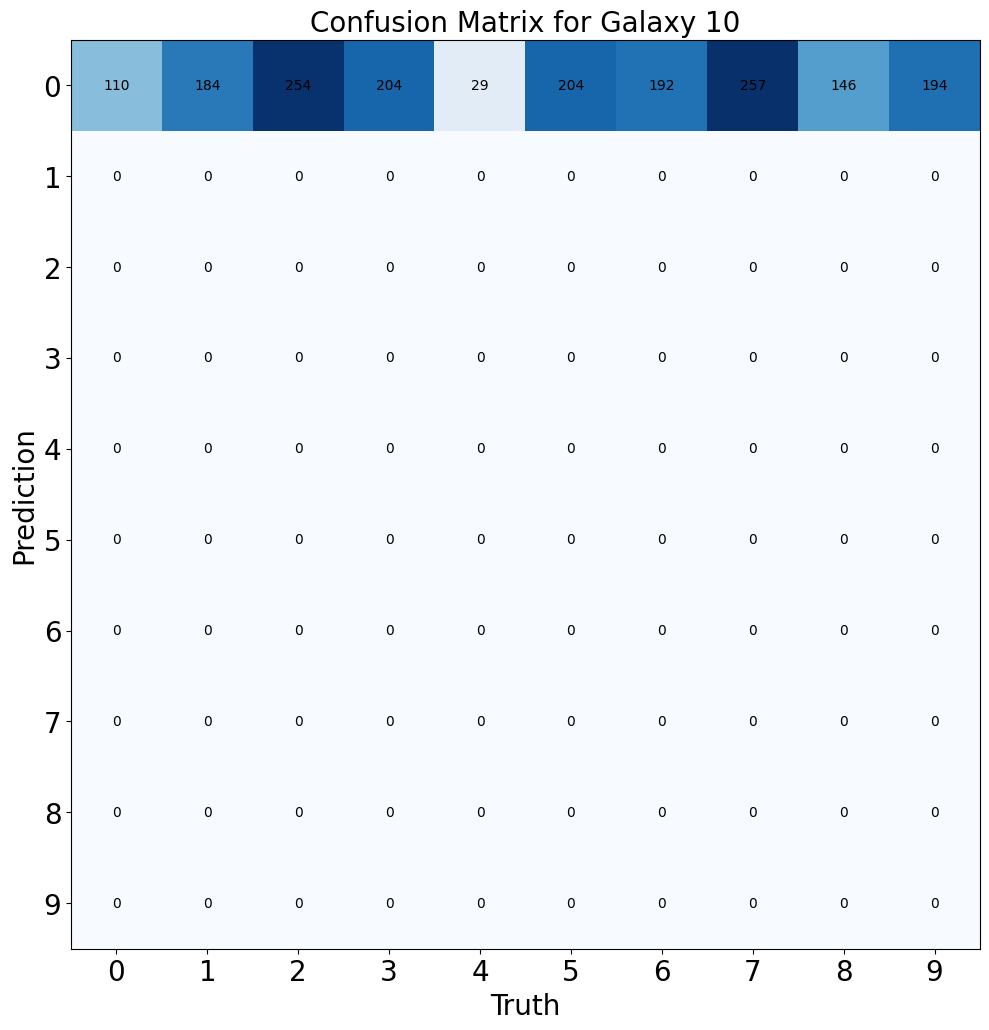

In [9]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Transfer Learning with VGG16

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(69, 69, 3))   #  first hidden layer


model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)


# print out the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 69, 69, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 17, 17, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 17, 17, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# freeze the weights
for layer in model.layers:
  layer.trainable = False

In [12]:
model.add(Flatten())


# Add some "Dense" layers here, including output layer
model.add(Dense(512))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10, activation="softmax")) #10 classes

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 2048, but received input with shape (None, 32768)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=True
  • mask=None

## Metrics

In [ ]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.6727856815052776
Averaged F1: 0.6622816159311162
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       341
           1       0.69      0.94      0.80       690
           2       0.81      0.57      0.67       637
           3       0.43      0.34      0.38        38
           4       0.81      0.83      0.82       159
           5       0.00      0.00      0.00         2
           6       0.65      0.52      0.58        62
           7       0.63      0.36      0.46       109
           8       0.52      0.47      0.49        94
           9       0.61      0.43      0.50        47

    accuracy                           0.67      2179
   macro avg       0.56      0.50      0.52      2179
weighted avg       0.68      0.67      0.66      2179



## Confusion Matrix

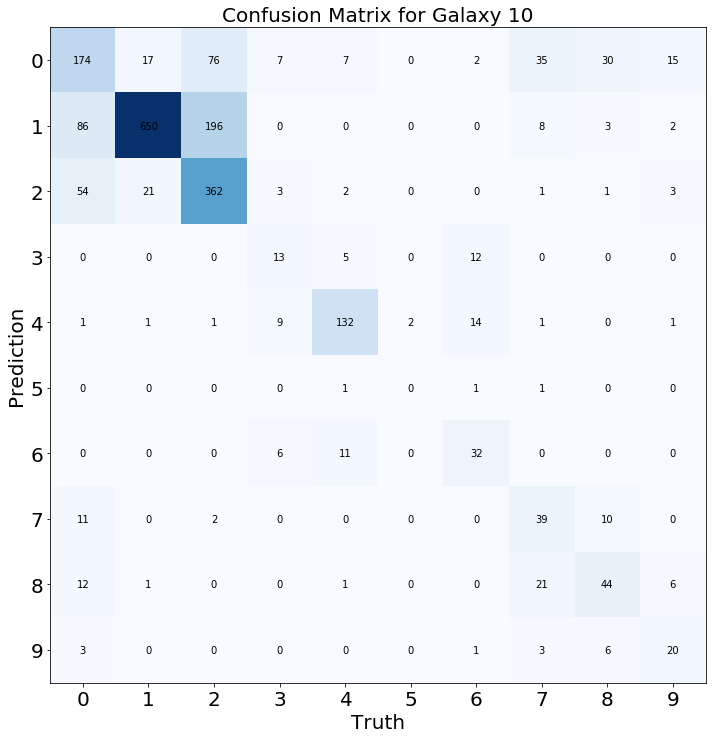

In [ ]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Transfer Learning with VGG19

In [14]:
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# need to have a sequential model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(69, 69, 3))   #  first hidden layer


model = Sequential()

for layer in vgg19_model.layers:
  model.add(layer)


# print out the model summary
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 69, 69, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 17, 17, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 17, 17, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 17, 17, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# freeze the weights
for layer in model.layers:
  layer.trainable = False

In [16]:
model.add(Flatten())


# Add some "Dense" layers here, including output layer
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10, activation="softmax")) #10 classes

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 2048, but received input with shape (None, 32768)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=True
  • mask=None

## Metrics

In [ ]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.6310234052317577
Averaged F1: 0.6167609482488682
              precision    recall  f1-score   support

           0       0.47      0.57      0.51       341
           1       0.65      0.91      0.76       690
           2       0.78      0.46      0.58       637
           3       0.42      0.45      0.44        38
           4       0.73      0.78      0.75       159
           5       0.00      0.00      0.00         2
           6       0.78      0.52      0.62        62
           7       0.56      0.42      0.48       109
           8       0.54      0.22      0.32        94
           9       0.37      0.40      0.39        47

    accuracy                           0.63      2179
   macro avg       0.53      0.47      0.48      2179
weighted avg       0.65      0.63      0.62      2179



## Confusion Matrix

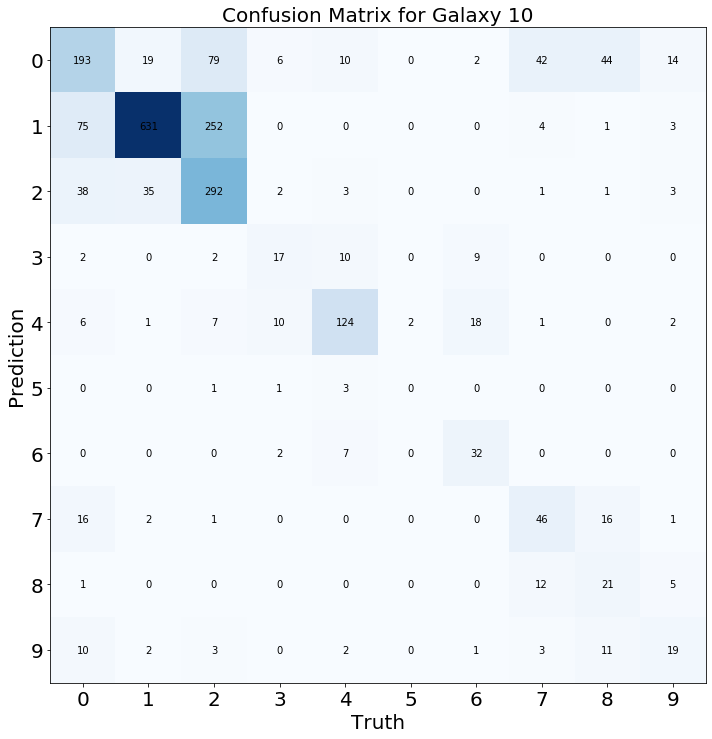

In [ ]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Transfer Learning with ResNet50

In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

height = 69 #dimensions of image
width = 69
channel = 3 #RGB

# Create pre-trained ResNet152 without top layer
model_resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(height, width, channel))


# add module of our model as follows, and use output of ResNet to input of the next layer
conv1 = Conv2D(32, (3,3), activation = 'relu', padding='same')(model_resnet.output)
pool1 = MaxPooling2D(2,2)(conv1)
bn1 = BatchNormalization(axis=3)(pool1)
drop1 = Dropout(0.2)(bn1)

flatten1 = Flatten()(drop1)
fc2 = Dense(10, activation='softmax')(flatten1)

# our final model
model = Model(inputs=model_resnet.input, outputs=fc2)

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_64"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 69, 69, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 75, 75, 3) │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 35, 35,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 35, 35,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 35, 35,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 37, 37,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 18, 18,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 18, 18,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 18, 18,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 18, 18,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 18, 18,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 18, 18,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 18, 18,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 18, 18,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 18, 18,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 18, 18,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 18, 18,    │      1,024 │ conv2_block1_3_c

 Total params: 24,178,026 (92.23 MB)

 Trainable params: 24,124,842 (92.03 MB)

 Non-trainable params: 53,184 (207.75 KB)

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy']) #categorical due to more than 2 classes
batch_size = 128 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=2, mode='auto')

# have to use less training data or this would take forever
model.fit(train_images[0:10000], train_labels[0:10000],    
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(test_images, test_labels),
          callbacks=[monitor])

Epoch 1/10


ValueError: Input 0 of layer "functional_64" is incompatible with the layer: expected shape=(None, 69, 69, 3), found shape=(None, 256, 256, 3)

## Metrics

In [ ]:
from sklearn import metrics

labels_true = np.argmax(test_labels,axis=1)
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(labels_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(labels_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(labels_true, pred))

Accuracy: 0.6594768242312987
Averaged F1: 0.6388435437750853
              precision    recall  f1-score   support

           0       0.42      0.78      0.55       341
           1       0.76      0.93      0.84       690
           2       0.96      0.34      0.50       637
           3       0.89      0.21      0.34        38
           4       0.77      0.88      0.82       159
           5       0.00      0.00      0.00         2
           6       0.68      0.92      0.78        62
           7       0.73      0.38      0.50       109
           8       0.46      0.41      0.44        94
           9       0.44      0.57      0.50        47

    accuracy                           0.66      2179
   macro avg       0.61      0.54      0.53      2179
weighted avg       0.74      0.66      0.64      2179



C:\Users\savan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

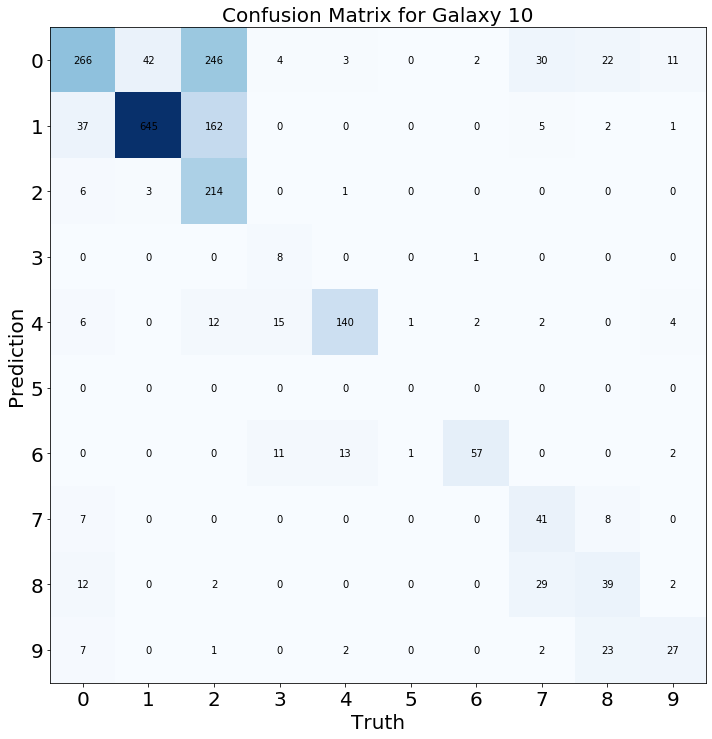

In [ ]:
from astroNN.datasets.galaxy10 import galaxy10_confusion
from sklearn.metrics import confusion_matrix, classification_report

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(pred):
    confusion_matrix[i, labels_true[counter]] += 1

# code modified from galaxy10_confusion(): https://github.com/henrysky/astroNN/blob/master/astroNN/datasets/galaxy10.py
def plot_confusion_matrix(confusion_mat):
  conf_arr = confusion_mat.astype(int)

  norm_conf = []
  a = np.max(conf_arr)
  for i in conf_arr:
      tmp_arr = []
      for j in i:
          tmp_arr.append(float(j) / float(a))
      norm_conf.append(tmp_arr)

  fig = plt.figure(figsize=(10, 10.5))
  ax = fig.gca()
  ax.set_title("Confusion Matrix for Galaxy 10", fontsize=20)
  ax.set_aspect(1)
  ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Blues'), interpolation='nearest')

  width, height = conf_arr.shape

  for x in range(width):
      for y in range(height):
          ax.annotate(str(conf_arr[x][y]), xy=(y, x),
                      horizontalalignment='center',
                      verticalalignment='center')

  ax.set_xticks(np.arange(width))
  ax.set_xticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_yticks(np.arange(height))
  ax.set_yticklabels([str(i) for i in range(width)], fontsize=20)
  ax.set_ylabel('Prediction', fontsize=20)
  ax.set_xlabel('Truth', fontsize=20)
  fig.tight_layout()


# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)